# Chapter 10. Dimensionality Reduction
## CPE 490 590
## Rahul Bhadani

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from statistics import mean
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

2025-03-01 13:23:43.189067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-01 13:23:44.094559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1. Toy Example

In [19]:
toydata = np.array([  
  [1, 1],
  [2, 1],
  [3, 2],
  [-1, -1],
  [-2, -1],
  [-3, -2]  
])

(-5.0, 5.0)

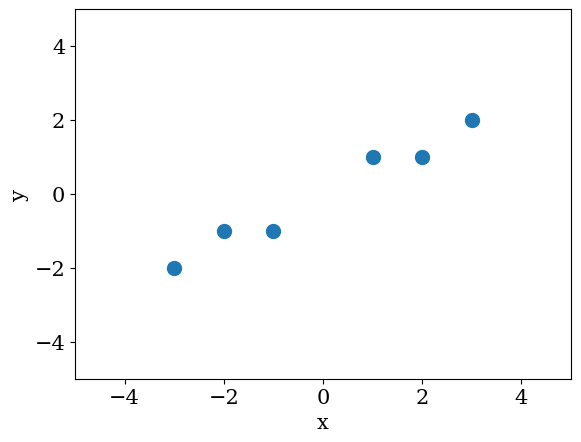

In [20]:
plt.scatter(toydata[:,0], toydata[:,1], s= 100)

# Set the labels for the x and y axes
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

## Apply PCA with one component only


In [21]:
pca_1 = PCA(n_components=1)
pca_1.fit(toydata)
pca_1.explained_variance_ratio_

array([0.99244289])

# Visualize

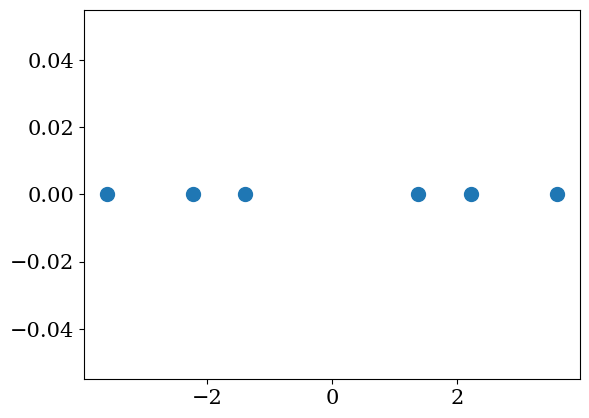

In [22]:
x_trans_1 = pca_1.transform(toydata)
x_trans_1
plt.scatter(x_trans_1, [0]*len(x_trans_1), s= 100)



# What would happen with two PC?

In [23]:
pca_2 = PCA(n_components=2)
pca_2.fit(toydata)
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [24]:
pca_2.explained_variance_ratio_[0]+ pca_2.explained_variance_ratio_[1]

1.0

(-5.0, 5.0)

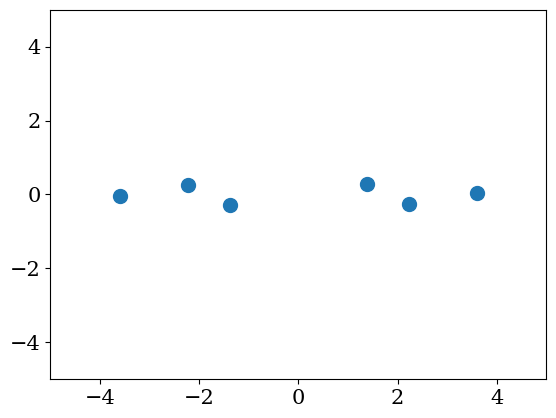

In [25]:
x_trans_2 = pca_2.transform(toydata)
plt.scatter(x_trans_2[:,0], x_trans_2[:,1], s= 100)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

## What's the relationship with original plot?

# 2. PCA using SVD on Iris Data

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 21


# Load the Iris dataset
Iris = pd.read_csv("https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Iris/iris.data")
Iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
Iris.shape

(150, 5)

Number of components to capture 99% variance: 3


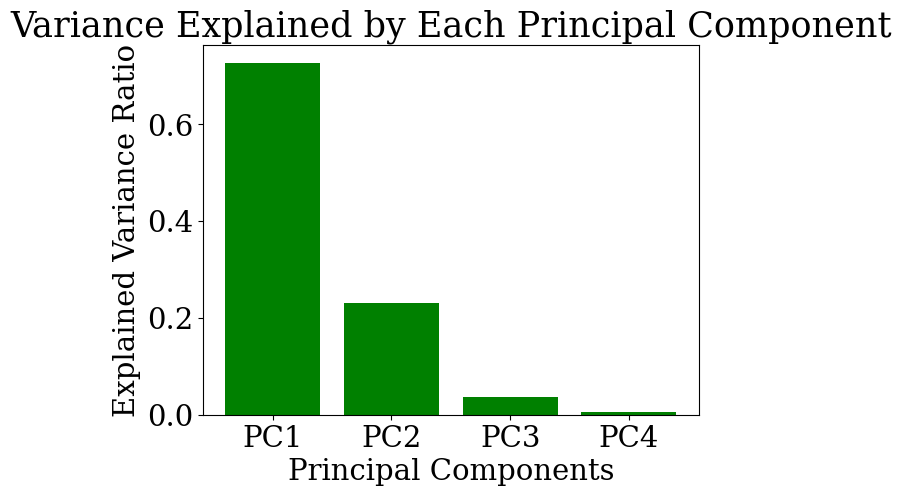

In [3]:

X = Iris.drop('Class', axis=1).values
X = torch.tensor(X, dtype=torch.float32)

# Transpose to follow textbook convention: D x N
X = X.T  # Now X is 4 x 150 (D x N)

# Standardize the data (mean=0, std=1)
# Standardize the data (mean=0, std=1)
mean = X.mean(dim=1, keepdim=True)  # Mean per feature (D x 1)
std = X.std(dim=1, keepdim=True)    # Std per feature (D x 1)
X_std = (X - mean) / std            # Standardized data (D x N)



# Perform Singular Value Decomposition (SVD)
Q, L, V = torch.svd(X_std)  # U: D x D, S: min(D, N), V: N x N

# Calculate explained variance ratios
explained_variance_ratio = (L ** 2) / (L ** 2).sum()

# Determine the number of components for 99% variance
cumulative_variance = torch.cumsum(explained_variance_ratio, dim=0)
n_components = (cumulative_variance >= 0.99).nonzero()[0].item() + 1  # +1 for 1-based index

print(f"Number of components to capture 99% variance: {n_components}")

# Plot the explained variance per component
components = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(components, explained_variance_ratio.numpy(), color='green')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [4]:
X_std.shape

torch.Size([4, 150])

In [5]:
Q.shape

torch.Size([4, 4])

In [6]:
L.shape

torch.Size([4])

In [7]:
V.shape

torch.Size([150, 4])

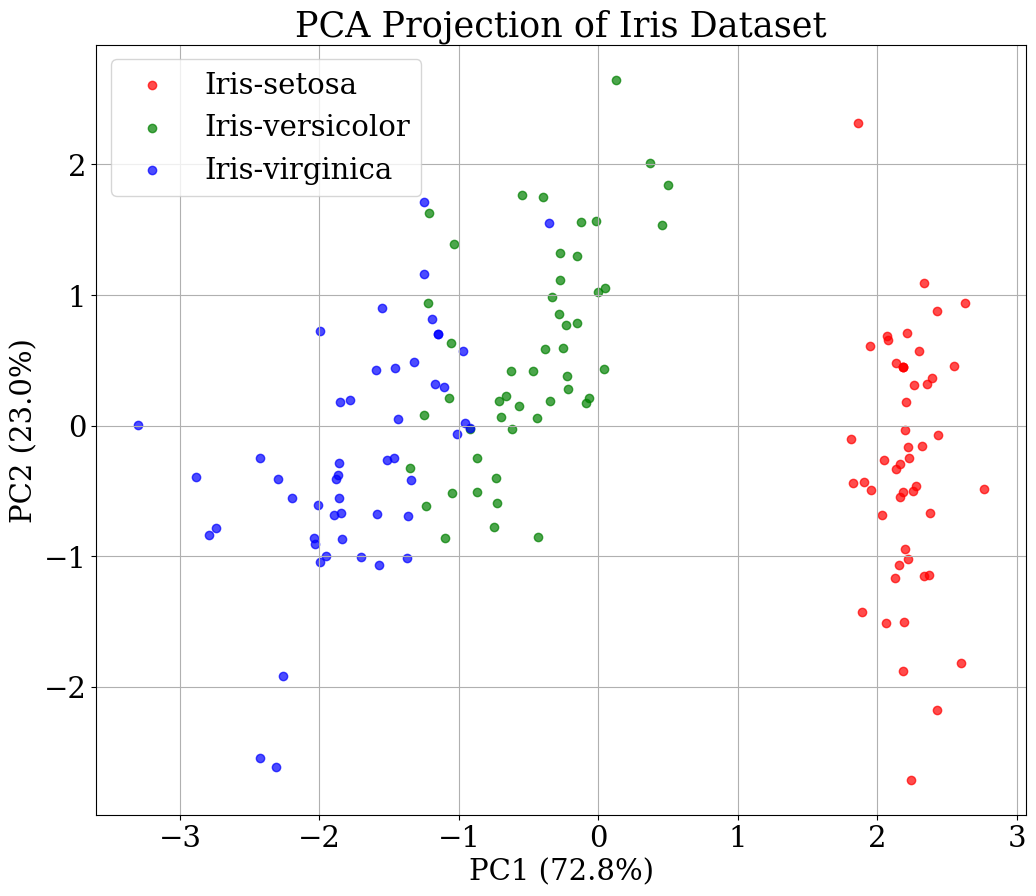

In [10]:

# Project data onto principal components
# Project data onto principal components
scores = (Q.T @ X_std).T  # Transpose to get N x D for easier plotting
pc1 = scores[:, 0]        # First principal component
pc2 = scores[:, 1]        # Second principal component

# Create color mapping for classes
class_names = Iris['Class'].unique()
colors = {'Iris-setosa': 'red', 
          'Iris-versicolor': 'green',
          'Iris-virginica': 'blue'}

# Plot PC1 vs PC2 with class colors
plt.figure(figsize=(12, 10))
for name in class_names:
    mask = Iris['Class'] == name
    plt.scatter(pc1[mask], pc2[mask], 
                c=colors[name], 
                label=name,
                alpha=0.7)

plt.xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}%)')
plt.title('PCA Projection of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

# 3. PCA using SKlearn

# Extract Features and Class (Labels)

In [11]:
X = Iris[["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]]
Labels = Iris[["Class"]]

# Scale The Features

In [12]:
# Standardize the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Apply PCA

In [13]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # We are reducing dimension to 2
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame that will help us in plotting


In [14]:
plot_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
plot_df = pd.concat([plot_df, Labels], axis = 1)

# Plot

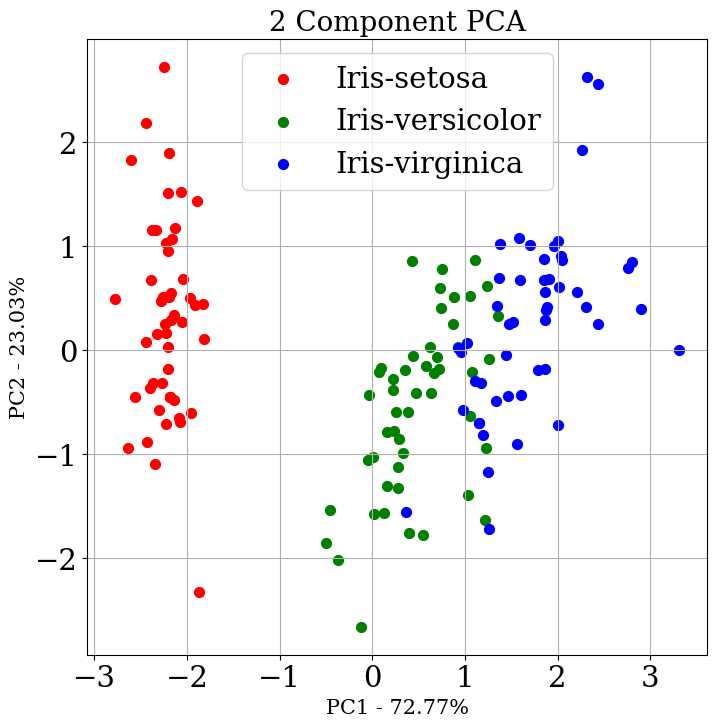

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(classes, colors):
    indicesToKeep = plot_df['Class'] == target
    ax.scatter(plot_df.loc[indicesToKeep, 'PC1'], plot_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

ax.legend(classes)
ax.grid()
plt.xlabel('PC1 - {0}%'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.show()

# Observation

We see that in latent space, three types of Iris leaves are distinguishable

# 4. PCA on a very high-dimensional Bioinformatics Data

In [26]:
data = pd.read_csv("https://github.com/rahulbhadani/CPE490_590_Sp2025/raw/refs/heads/master/Data/GSE72056/Data1.csv", index_col=0)
data.dropna(inplace=True) #remove drop na
data.head()

,MMP2,BANK1,TEK,B2M,SNCA,VAT1,ARHGDIB,MFGE8,SRPX,IGSF6,...,LIME1,BATF,PDIA5,HGF,DYNC1LI2,AGTRAP,RPL10,PALM,ITGA6,C2
cy72.CD45.pos.F08.S932.comb,0.0,4.2941,0.0,10.1820,0.0000,0.0000,5.0626,0.0000,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.0289,0.0,0.0000,0.0000
cy84_Primary_CD45_pos_H03_S471_comb,0.0,0.0000,0.0,11.0110,0.0000,0.0000,7.3478,0.0000,0.0000,0.0,...,7.1395,0.0,0.0,0.0,0.0,0.0000,8.2980,0.0,0.0000,1.5226
Cy59_56,0.0,0.0000,0.0,4.2538,2.6358,3.7239,0.0000,3.2590,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.5804,0.0,0.0000,0.0000
cy79.p3.CD45.neg.PDL1.neg.B10.S214.comb,0.0,0.0000,0.0,10.1910,4.1745,6.5239,4.3916,7.2226,2.2981,0.0,...,0.0000,0.0,0.0,0.0,0.0,4.6172,4.8928,0.0,2.9424,0.0000
cy94_cd45pos_H11_S191_comb,0.0,0.0000,0.0,10.5700,0.0000,0.0000,6.8512,0.0000,0.0000,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0000,8.0379,0.0,0.0000,0.0000


In [27]:
data.shape

(3384, 2000)

So we have 3384 samples and 2000 features

# Apply PCA with two components

In [28]:

pca_2 = PCA(n_components=2)
data_2d = pca_2.fit_transform(data)

# Plot two components

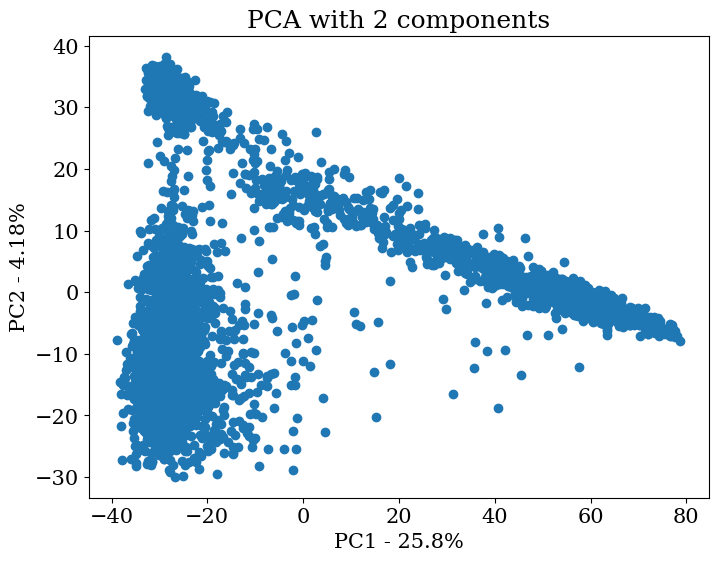

In [29]:
# Plot 2D
plt.figure(figsize=(8,6))
plt.scatter(data_2d[:,0], data_2d[:,1])
plt.title('PCA with 2 components')
plt.xlabel('PC1 - {0}%'.format(round(pca_2.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca_2.explained_variance_ratio_[1]*100, 2)))
plt.show()


In [30]:
pca_2.explained_variance_ratio_

array([0.25799759, 0.04175993])

In [31]:
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
df_2d

,PC1,PC2
0,-23.504171,26.750153
1,-29.982999,-1.233877
2,5.584546,14.479312
3,64.487984,-2.014553
4,-29.389704,7.382029
...,...,...
3379,-29.134932,21.260950
3380,-24.977464,-1.127470
3381,-20.066902,-11.102044
3382,-33.522570,-21.447298


# Apply PCA with three components

In [32]:
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(data)

# Plot three components

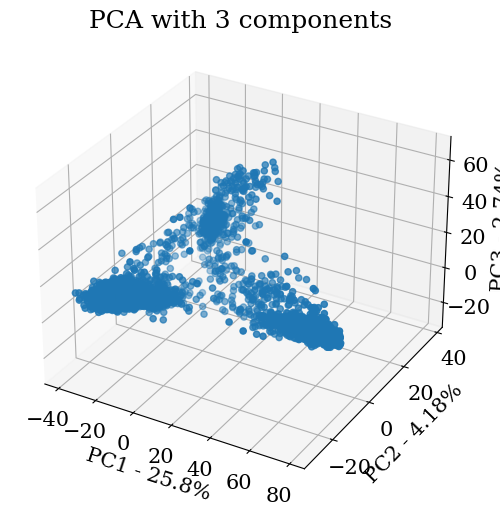

In [33]:
# Plot 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2])
ax.set_title('PCA with 3 components')
ax.set_xlabel('PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)))
ax.set_ylabel('PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)))
ax.set_zlabel('PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2)))
plt.show()

# Interactive 3D Plot


In [34]:
import plotly.express as px

# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



In [35]:
df_3d

,PC1,PC2,PC3
0,-23.504171,26.750153,2.933376
1,-29.982999,-1.233877,-13.096267
2,5.584546,14.479312,-25.056057
3,64.487984,-2.014553,-3.124316
4,-29.389704,7.382029,-15.936046
...,...,...,...
3379,-29.134932,21.260950,9.140178
3380,-24.977464,-1.127470,-12.628148
3381,-20.066902,-11.102044,6.931624
3382,-33.522570,-21.447298,8.617229
